In [3]:
%matplotlib inline

from ipywidgets.widgets import interact, FloatSlider

from pymatgen.analysis import nmr
from interaction.NuclearShielding import csa_zg_static as static_zg
import matplotlib.pyplot as plt
import numpy as np

from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook

output_notebook(resources=None, verbose=False, hide_banner=True)

In [4]:
nt = 48
m = 256
sampling_interval = 0.1 # ppm
reference_offset = ref = -110 # ppm

tensors = [nmr.ChemicalShielding([3+ref, 1+ref, -1+ref])]



freq, lineshape = static_zg(tensors, number_of_points=m, 
                            sampling_interval=sampling_interval, 
                            reference_offset=reference_offset, nt=nt)

plot = figure(plot_height=300, plot_width=400, \
              title="Nuclear Shielding static lineshape",
              tools="box_zoom,reset,save",
              x_range=[freq[0], freq[-1]],)

line = plot.line(freq, lineshape[:,0], line_width=1.5, line_alpha=1, color='black')

def simpleLineshapeGenerator(x_pas, y_pas, z_pas):
    tensors = [nmr.ChemicalShielding([x_pas, y_pas, z_pas])]
    freq, lineshape = static_zg(tensors, number_of_points=m, 
                            sampling_interval=sampling_interval, 
                            reference_offset=reference_offset, nt=nt)
    line.data_source.data['y'] = lineshape[:,0]
    print('iso ', tensors[0].haeberlen_values.sigma_iso + reference_offset)
    print('zeta', tensors[0].haeberlen_values.zeta)
    print('eta ', tensors[0].haeberlen_values.eta)
    push_notebook()

show(plot, notebook_handle=True)
interact(simpleLineshapeGenerator, \
         x_pas=FloatSlider(min=-15.+ref,max=15.+ref,step=0.1,value=4.0+ref), \
         y_pas=FloatSlider(min=-15.+ref,max=15.+ref,step=0.1,value=5.1+ref), \
         z_pas=FloatSlider(min=-15.+ref,max=15.+ref,step=0.1,value=0.1+ref));


TypeError: csa_zg_static() got an unexpected keyword argument 'number_of_points'

In [4]:
# tensors = [[[1,0,0],
#           [0,2,0],
#           [0,0,6]]];

### Generating random nuclear shielding tensors as an 
### pymatgen.analysis.nmr.ChemicalShielding object

ref = -110 # ppm
n_tensors = 2
random = (np.random.rand(n_tensors,6)*2-1.0)*9
tensors = np.empty((n_tensors,3,3))
tensors[:,0,0]=random[:,0]+ref
tensors[:,0,1]=tensors[:,1,0]=random[:,1]
tensors[:,0,2]=tensors[:,2,0]=random[:,2]
tensors[:,1,1]=random[:,3]+ref
tensors[:,1,2]=tensors[:,2,1]=random[:,4]
tensors[:,2,2]=random[:,5]+ref

tensors = [nmr.ChemicalShielding(tensor) for tensor in tensors]


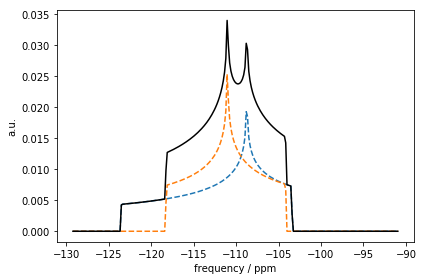

In [5]:
nt = 128
m = 256
sampling_interval = 0.15 # ppm
reference_offset = -110 # ppm

freq, lineshape = static_zg(tensors, m, sampling_interval, 
                         reference_offset, nt=nt)


fig2, ax2 = plt.subplots(1,1)
ax2.plot(freq, lineshape, '--')
ax2.plot(freq, lineshape.sum(axis=1), 'k')
ax2.set_xlabel('frequency / ppm')
ax2.set_ylabel('a.u.')
plt.tight_layout()
plt.close()
display(fig2)